<a href="https://colab.research.google.com/github/aparna-2001/medical-insurance-charges-ML-model-2021-2025/blob/main/medical_insurance_charges_ML_model_2021_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data**



*   [Medical Insurance Charges (2021–2025) Enhanced](https://www.kaggle.com/datasets/ibrahimshahrukh/medical-insurance-cost-dataset-usa)



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


**DATA LOADING**

In [3]:
medical_df = pd.read_csv('medical_insurance_2026_kaggle.csv')

In [4]:
pd.set_option('display.max_columns', None)

medical_df.head()

,record_date,year,quarter,age,age_group,sex,sex_female,bmi,bmi_category,children,smoker,smoker_flag,is_high_risk,risk_score,region,region_northeast,region_northwest,region_southeast,region_southwest,charges,monthly_premium_est,charges_per_child,insurance_tier,bmi_age_interaction
0,2024-02-01,2024,1,19,Young Adult (18-25),female,1,27.90,Overweight,0,yes,1,1,5.35,southwest,0,0,0,1,16884.92,1407.08,0.00,Platinum,530.10
1,2024-12-30,2024,4,18,Young Adult (18-25),male,0,33.77,Obese Class I,1,no,0,1,1.40,southeast,0,0,1,0,1725.55,143.80,1725.55,Bronze,607.86
2,2023-05-11,2023,2,28,Adult (26-35),male,0,33.00,Obese Class I,3,no,0,1,2.18,southeast,0,0,1,0,4449.46,370.79,1483.15,Silver,924.00
3,2024-07-18,2024,3,33,Adult (26-35),male,0,22.70,Normal Weight,0,no,0,0,1.11,northwest,0,1,0,0,21984.47,1832.04,0.00,Diamond,749.10
4,2024-02-05,2024,1,32,Adult (26-35),male,0,28.88,Overweight,0,no,0,0,1.48,northwest,0,1,0,0,3866.86,322.24,0.00,Bronze,924.16


In [5]:
medical_df.tail()

,record_date,year,quarter,age,age_group,sex,sex_female,bmi,bmi_category,children,smoker,smoker_flag,is_high_risk,risk_score,region,region_northeast,region_northwest,region_southeast,region_southwest,charges,monthly_premium_est,charges_per_child,insurance_tier,bmi_age_interaction
1332,2025-06-28,2025,2,50,Senior-Middle (46-55),male,0,30.97,Obese Class I,3,no,0,1,3.00,northwest,0,1,0,0,10600.55,883.38,3533.52,Gold,1548.50
1333,2021-04-14,2021,2,18,Young Adult (18-25),female,1,31.92,Obese Class I,0,no,0,1,1.07,northeast,1,0,0,0,2205.98,183.83,0.00,Bronze,574.56
1334,2023-11-29,2023,4,18,Young Adult (18-25),female,1,36.85,Obese Class II,0,no,0,1,1.41,southeast,0,0,1,0,1629.83,135.82,0.00,Bronze,663.30
1335,2021-07-17,2021,3,21,Young Adult (18-25),female,1,25.80,Overweight,0,no,0,0,0.79,southwest,0,0,0,1,2007.94,167.33,0.00,Bronze,541.80
1336,2025-07-28,2025,3,61,Senior (56+),female,1,29.07,Overweight,0,yes,1,1,7.25,northwest,0,1,0,0,29141.36,2428.45,0.00,Diamond,1773.27


In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_date          1337 non-null   object 
 1   year                 1337 non-null   int64  
 2   quarter              1337 non-null   int64  
 3   age                  1337 non-null   int64  
 4   age_group            1337 non-null   object 
 5   sex                  1337 non-null   object 
 6   sex_female           1337 non-null   int64  
 7   bmi                  1337 non-null   float64
 8   bmi_category         1337 non-null   object 
 9   children             1337 non-null   int64  
 10  smoker               1337 non-null   object 
 11  smoker_flag          1337 non-null   int64  
 12  is_high_risk         1337 non-null   int64  
 13  risk_score           1337 non-null   float64
 14  region               1337 non-null   object 
 15  region_northeast     1337 non-null   i

In [7]:
medical_df.shape

(1337, 24)

In [8]:
list(medical_df.columns)

['record_date',
 'year',
 'quarter',
 'age',
 'age_group',
 'sex',
 'sex_female',
 'bmi',
 'bmi_category',
 'children',
 'smoker',
 'smoker_flag',
 'is_high_risk',
 'risk_score',
 'region',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'charges',
 'monthly_premium_est',
 'charges_per_child',
 'insurance_tier',
 'bmi_age_interaction']

In [9]:
medical_df.describe()

,year,quarter,age,sex_female,bmi,children,smoker_flag,is_high_risk,risk_score,region_northeast,region_northwest,region_southeast,region_southwest,charges,monthly_premium_est,charges_per_child,bmi_age_interaction
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,2023.036649,2.477936,39.222139,0.495138,30.663628,1.095737,0.204936,0.624533,3.052939,0.242334,0.242334,0.272251,0.243082,13279.121503,1106.593328,5127.538257,1212.054233
std,1.384042,1.121910,14.044333,0.500163,6.100233,1.205571,0.403806,0.484425,1.981412,0.428655,0.428655,0.445285,0.429104,12110.359677,1009.196560,8357.618626,522.515951
min,2021.000000,1.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000,93.490000,0.000000,287.280000
25%,2022.000000,1.000000,27.000000,0.000000,26.290000,0.000000,0.000000,0.000000,1.690000,0.000000,0.000000,0.000000,0.000000,4746.340000,395.530000,0.000000,765.700000
50%,2023.000000,2.000000,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,2.480000,0.000000,0.000000,0.000000,0.000000,9386.160000,782.180000,2174.730000,1154.400000
75%,2024.000000,4.000000,51.000000,1.000000,34.700000,2.000000,0.000000,1.000000,3.410000,0.000000,0.000000,1.000000,0.000000,16657.720000,1388.140000,6399.980000,1589.280000
max,2025.000000,4.000000,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,8.320000,1.000000,1.000000,1.000000,1.000000,63770.430000,5314.200000,58571.070000,2845.480000


In [10]:
info = pd.DataFrame({
    'dtype': medical_df.dtypes,
    'non_null': medical_df.notnull().sum(),
    'missing': medical_df.isnull().sum(),
    'missing_%': (medical_df.isnull().mean()*100).round(2),
    'nunique': medical_df.nunique()
})
print(info.to_string())

                       dtype  non_null  missing  missing_%  nunique
record_date           object      1337        0        0.0      932
year                   int64      1337        0        0.0        5
quarter                int64      1337        0        0.0        4
age                    int64      1337        0        0.0       47
age_group             object      1337        0        0.0        5
sex                   object      1337        0        0.0        2
sex_female             int64      1337        0        0.0        2
bmi                  float64      1337        0        0.0      528
bmi_category          object      1337        0        0.0        6
children               int64      1337        0        0.0        6
smoker                object      1337        0        0.0        2
smoker_flag            int64      1337        0        0.0        2
is_high_risk           int64      1337        0        0.0        2
risk_score           float64      1337        0 

* Only keeping the primary data

In [11]:
cols_to_drop = [

  'record_date',
 'year',
 'quarter',
 'age_group',
 'sex_female',
 'bmi_category',
 'smoker_flag',
 'is_high_risk',
 'risk_score',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'monthly_premium_est',
 'charges_per_child',
 'insurance_tier',
 'bmi_age_interaction']

medical_df_clean = medical_df.drop(columns=cols_to_drop)
medical_df_clean.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
medical_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [13]:
# Encode before any analysis
medical_df_clean = pd.get_dummies(medical_df_clean, columns=['sex', 'smoker', 'region'], drop_first=True)
medical_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   bool   
 5   smoker_yes        1337 non-null   bool   
 6   region_northwest  1337 non-null   bool   
 7   region_southeast  1337 non-null   bool   
 8   region_southwest  1337 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.4 KB


In [14]:
bool_cols = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
medical_df_clean[bool_cols] = medical_df_clean[bool_cols].astype(int)

medical_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   int64  
 5   smoker_yes        1337 non-null   int64  
 6   region_northwest  1337 non-null   int64  
 7   region_southeast  1337 non-null   int64  
 8   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.1 KB


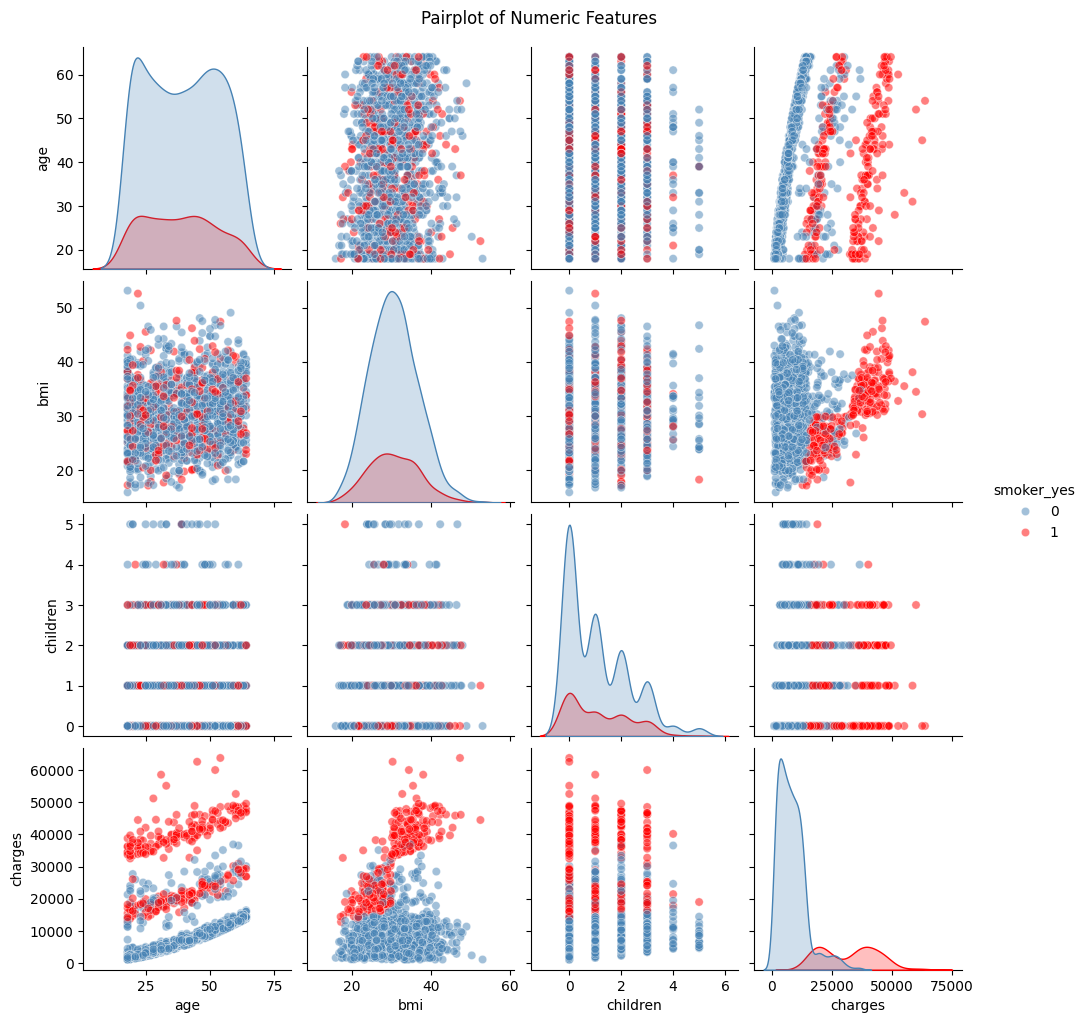

In [17]:
sns.pairplot(medical_df_clean,
             vars=['age', 'bmi', 'children', 'charges'],
             hue='smoker_yes',
             plot_kws={'alpha': 0.5},
             palette={0: 'steelblue', 1: 'red'})

plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

* Age shows three distinct groupings with smokers at a higher claim

* smoking and bmi combinely caused higher charges.

* According to BMI index,

    * < 18.5 = underweight
    * 18.5 - 24.9 = Normal
    * 25 - 29.9 = Overweight
    * 30 - 34.9 = Obese Class I
    * ≥ 35 = 0bese Class II

In [18]:
# Creating BMI categories using WHO classification
medical_df_clean['bmi_group'] = pd.cut(
    medical_df_clean['bmi'],
    bins=[0, 18.5, 25, 30, 35, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese_I', 'Obese_II']
)

# Crosstab: mean charges by BMI group and smoker status
crosstab_mean = pd.crosstab(
    medical_df_clean['bmi_group'],
    medical_df_clean['smoker_yes'],
    values=medical_df_clean['charges'],
    aggfunc='mean'
).round(2)

crosstab_mean.columns = ['Non-Smoker', 'Smoker']
print("=== Mean Charges by BMI Group and Smoker Status ===")
print(crosstab_mean)

# Count
crosstab_count = pd.crosstab(
    medical_df_clean['bmi_group'],
    medical_df_clean['smoker_yes']
)
crosstab_count.columns = ['Non-Smoker', 'Smoker']
print("\n=== Count by BMI Group and Smoker Status ===")
print(crosstab_count)

=== Mean Charges by BMI Group and Smoker Status ===
             Non-Smoker    Smoker
bmi_group                        
Underweight     5485.06  18809.83
Normal          7734.65  19942.22
Overweight      8226.09  22491.18
Obese_I         8571.89  39880.27
Obese_II        9244.50  43556.40

=== Count by BMI Group and Smoker Status ===
             Non-Smoker  Smoker
bmi_group                      
Underweight          16       5
Normal              176      50
Overweight          311      75
Obese_I             315      73
Obese_II            245      71


* Obese_I  Non-Smoker- $8,571  vs  Smoker- $39,880  ← 4.6x jump!

* Obese_II Non-Smoker- $9,244  vs  Smoker- $43,556  ← 4.7x jump!

* Obese 1 and obese 2 are more influential.

In [19]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese_I', 'Obese_II']])

medical_df_clean['bmi_group_encoded'] = oe.fit_transform(medical_df_clean[['bmi_group']])

print(medical_df_clean['bmi_group_encoded'].value_counts().sort_index())

bmi_group_encoded
0.0     21
1.0    226
2.0    386
3.0    388
4.0    316
Name: count, dtype: int64


In [20]:
medical_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                1337 non-null   int64   
 1   bmi                1337 non-null   float64 
 2   children           1337 non-null   int64   
 3   charges            1337 non-null   float64 
 4   sex_male           1337 non-null   int64   
 5   smoker_yes         1337 non-null   int64   
 6   region_northwest   1337 non-null   int64   
 7   region_southeast   1337 non-null   int64   
 8   region_southwest   1337 non-null   int64   
 9   bmi_group          1337 non-null   category
 10  bmi_group_encoded  1337 non-null   float64 
dtypes: category(1), float64(3), int64(7)
memory usage: 106.1 KB


In [21]:
medical_df_clean.drop(columns=['bmi_group'], inplace=True)
medical_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1337 non-null   int64  
 1   bmi                1337 non-null   float64
 2   children           1337 non-null   int64  
 3   charges            1337 non-null   float64
 4   sex_male           1337 non-null   int64  
 5   smoker_yes         1337 non-null   int64  
 6   region_northwest   1337 non-null   int64  
 7   region_southeast   1337 non-null   int64  
 8   region_southwest   1337 non-null   int64  
 9   bmi_group_encoded  1337 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 104.6 KB


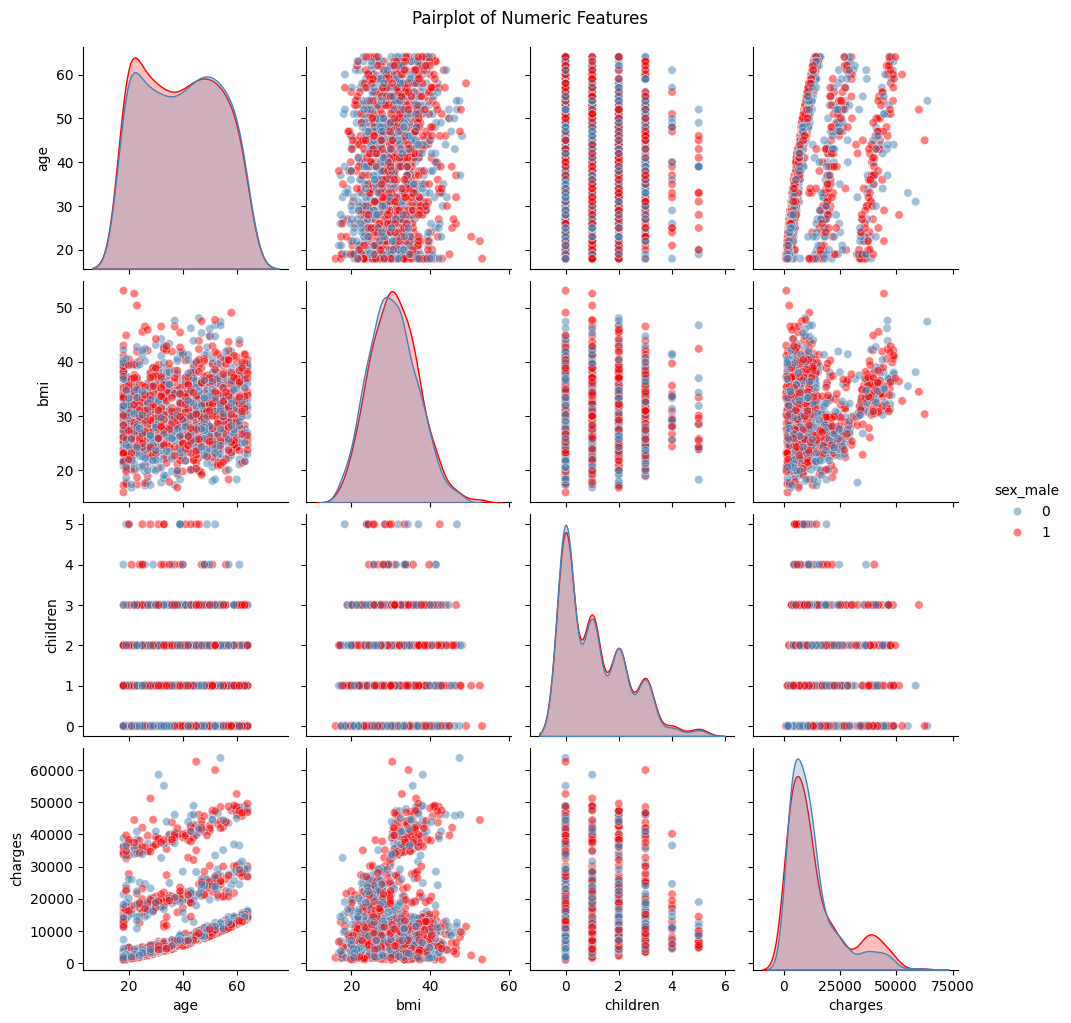

In [22]:
sns.pairplot(medical_df_clean,
             vars=['age', 'bmi', 'children', 'charges'],
             hue='sex_male',
             plot_kws={'alpha': 0.5},
             palette={0: 'steelblue', 1: 'red'})

plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

* Here sex male and female overlaps in almost everything which means sex has very influence in the charges

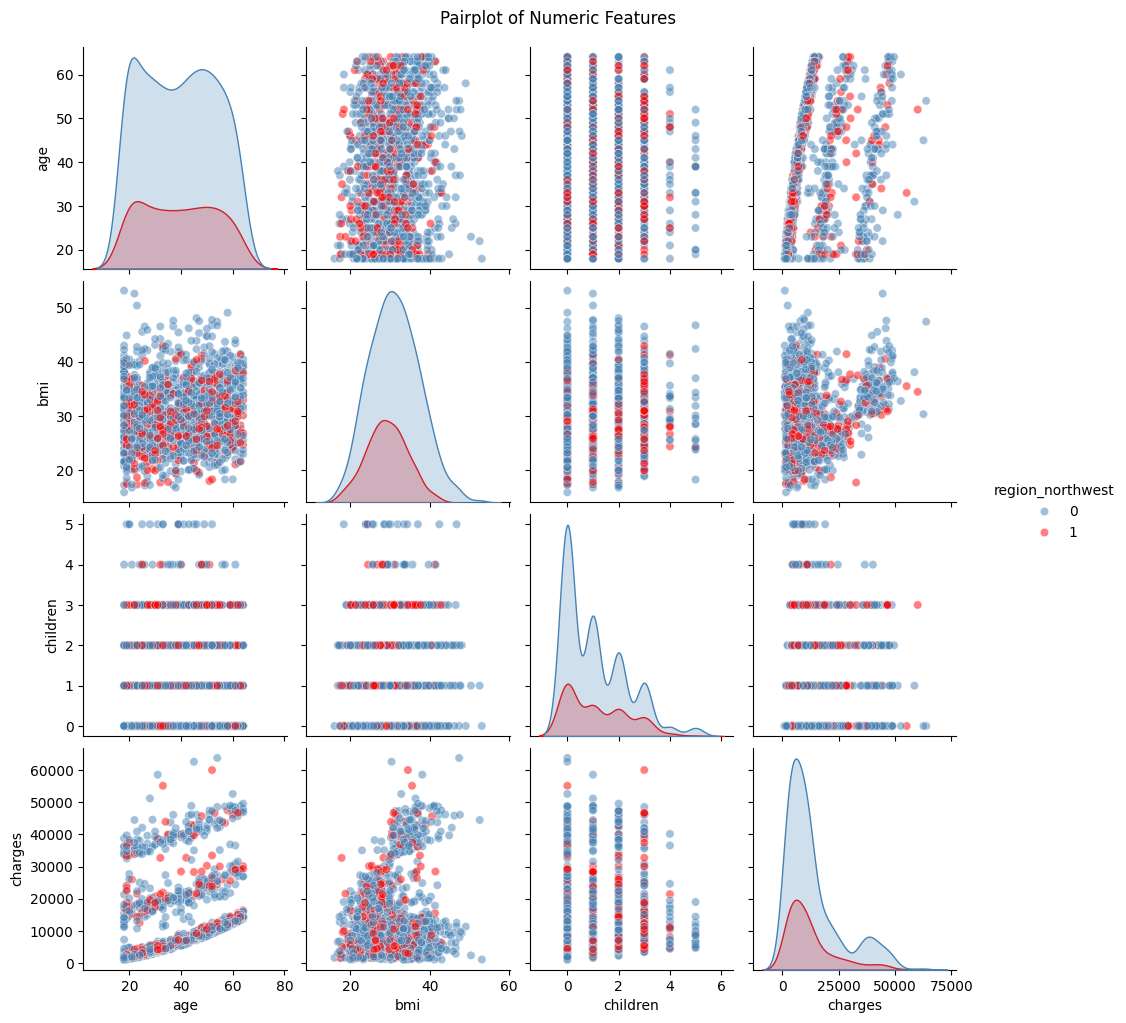

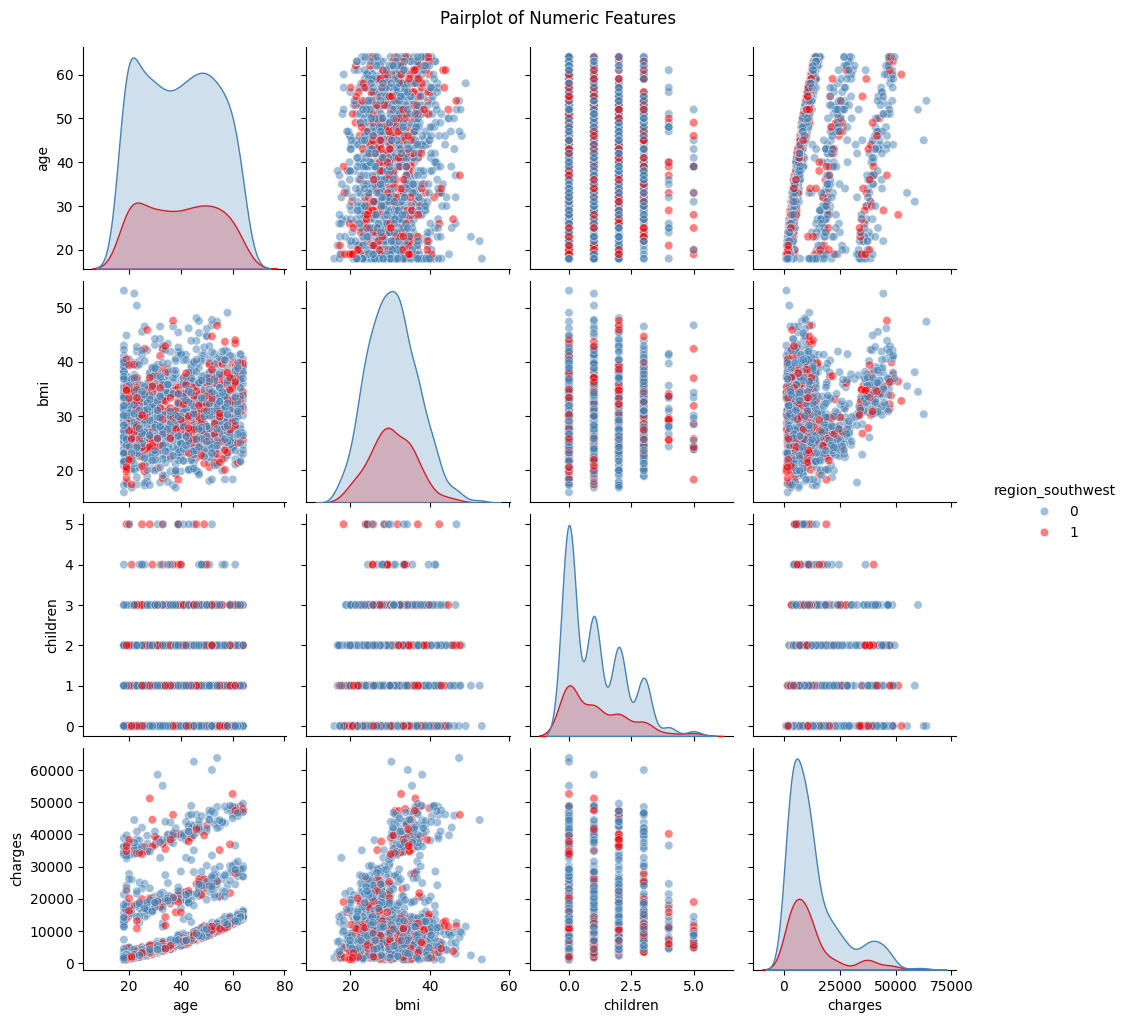

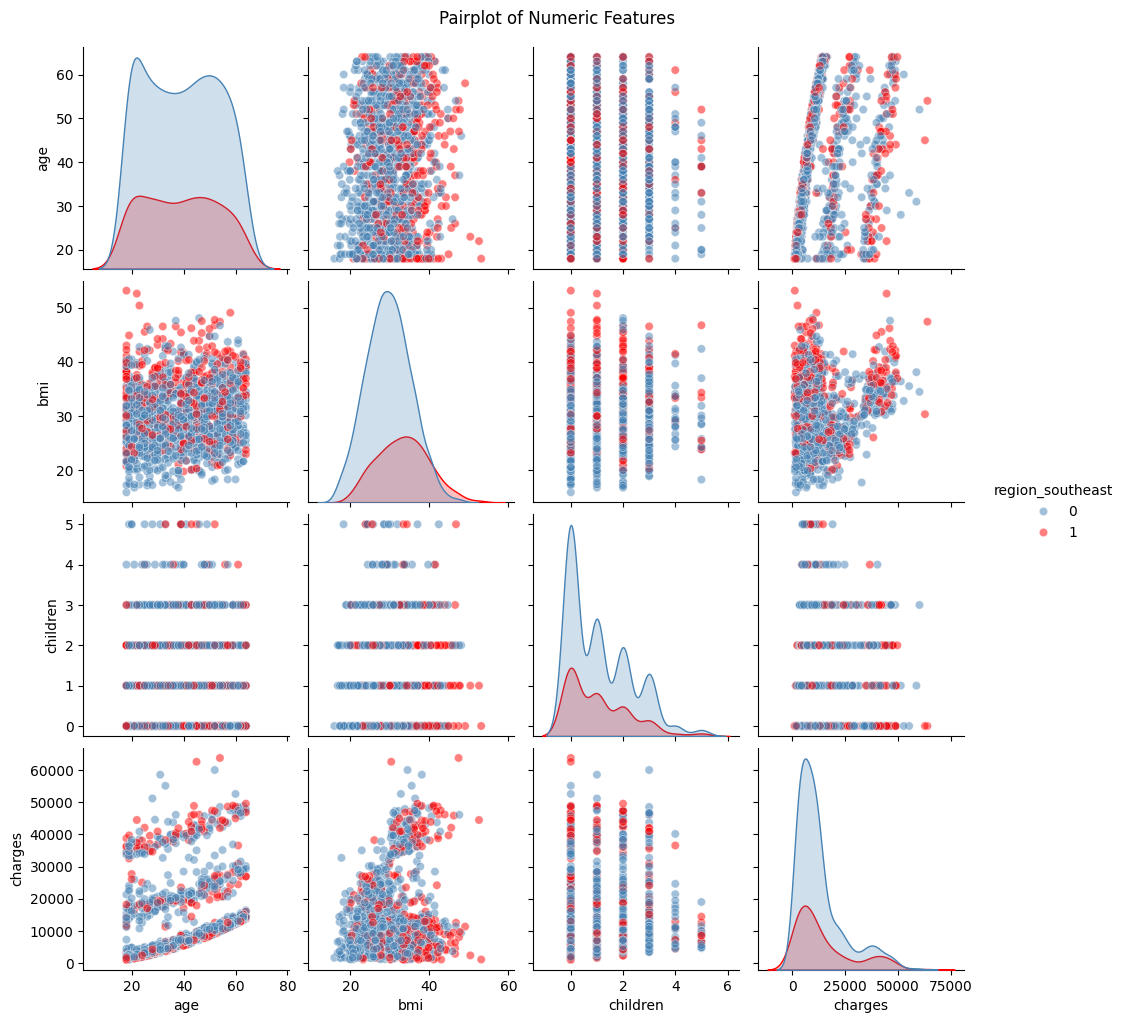

In [23]:
sns.pairplot(medical_df_clean,
             vars=['age', 'bmi', 'children', 'charges'],
             hue='region_northwest',
             plot_kws={'alpha': 0.5},
             palette={0: 'steelblue', 1: 'red'})

plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


sns.pairplot(medical_df_clean,
             vars=['age', 'bmi', 'children', 'charges'],
             hue='region_southwest',
             plot_kws={'alpha': 0.5},
             palette={0: 'steelblue', 1: 'red'})

plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show(),'\n'

sns.pairplot(medical_df_clean,
             vars=['age', 'bmi', 'children', 'charges'],
             hue='region_southeast',
             plot_kws={'alpha': 0.5},
             palette={0: 'steelblue', 1: 'red'})

plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

* since region doesn't show any clear pattern, it might have very low influence in charges

feature engineering of smokers and age,

In [24]:
medical_df_clean['age_smoker_interaction'] = medical_df_clean['age'] * medical_df_clean['smoker_yes']

In [25]:
medical_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1337 non-null   int64  
 1   bmi                     1337 non-null   float64
 2   children                1337 non-null   int64  
 3   charges                 1337 non-null   float64
 4   sex_male                1337 non-null   int64  
 5   smoker_yes              1337 non-null   int64  
 6   region_northwest        1337 non-null   int64  
 7   region_southeast        1337 non-null   int64  
 8   region_southwest        1337 non-null   int64  
 9   bmi_group_encoded       1337 non-null   float64
 10  age_smoker_interaction  1337 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 115.0 KB


In [26]:
medical_df_clean['age_smoker_interaction'].value_counts()

,count
age_smoker_interaction,
0,1063
19,18
18,12
43,12
47,10
20,9
30,9
27,9
37,9


feature engineering of age and BMI

In [27]:
# Bin age and BMI into categories first
medical_df['age_bin'] = pd.cut(medical_df['age'],
                                bins=[18, 25, 35, 45, 55, 65],
                                labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

medical_df['bmi_bin'] = pd.cut(medical_df['bmi'],
                                bins=[0, 18.5, 25, 30, 35, 60],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II+'])

# Crosstab — counts
crosstab = pd.crosstab(medical_df['age_bin'], medical_df['bmi_bin'])
print("=== COUNT ===")
print(crosstab)

# Crosstab — percentages (row-wise)
crosstab_pct = pd.crosstab(medical_df['age_bin'], medical_df['bmi_bin'], normalize='index') * 100
print("\n=== ROW % (what BMI category dominates each age group) ===")
print(crosstab_pct.round(2))

# Crosstab — mean charges per cell
crosstab_charges = medical_df.pivot_table(values='charges',
                                           index='age_bin',
                                           columns='bmi_bin',
                                           aggfunc='mean').round(2)
print("\n=== MEAN CHARGES PER CELL ===")
print(crosstab_charges)

=== COUNT ===
bmi_bin  Underweight  Normal  Overweight  Obese I  Obese II+
age_bin                                                     
18-25              5      51          69       71         40
26-35              7      50          81       71         59
36-45              3      47          87       73         54
46-55              2      41          77       89         75
56-65              2      26          58       63         67

=== ROW % (what BMI category dominates each age group) ===
bmi_bin  Underweight  Normal  Overweight  Obese I  Obese II+
age_bin                                                     
18-25           2.12   21.61       29.24    30.08      16.95
26-35           2.61   18.66       30.22    26.49      22.01
36-45           1.14   17.80       32.95    27.65      20.45
46-55           0.70   14.44       27.11    31.34      26.41
56-65           0.93   12.04       26.85    29.17      31.02

=== MEAN CHARGES PER CELL ===
bmi_bin  Underweight    Normal  Overweigh

/tmp/ipython-input-242/600378152.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  crosstab_charges = medical_df.pivot_table(values='charges',


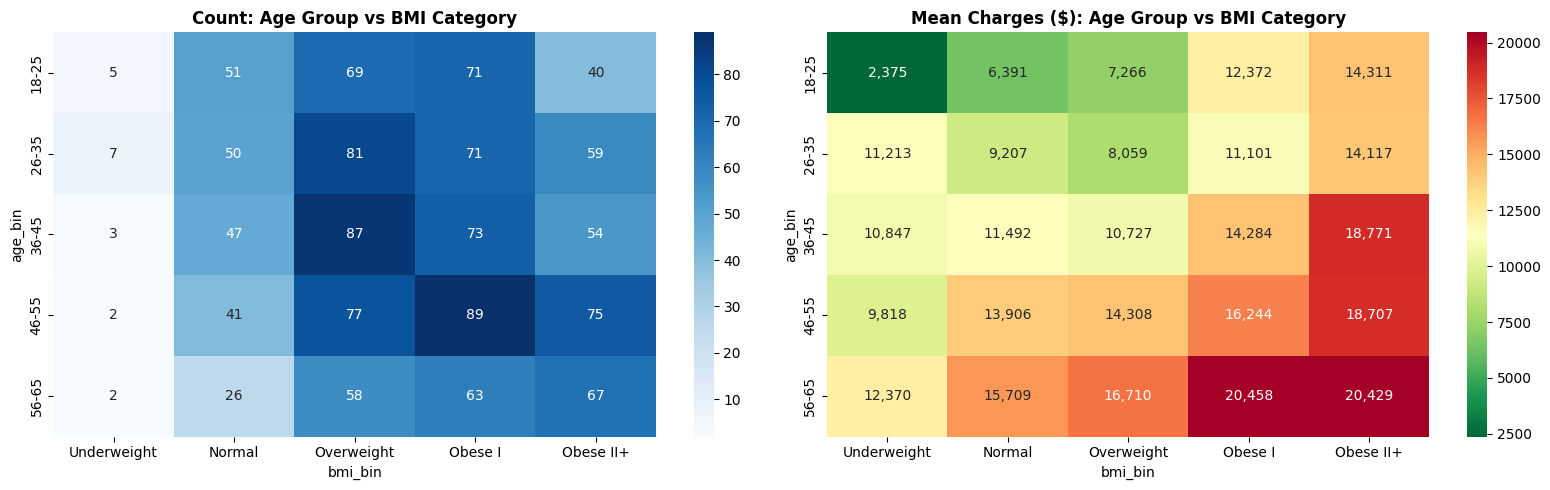

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Count heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Count: Age Group vs BMI Category', fontweight='bold')

# Mean charges heatmap
sns.heatmap(crosstab_charges, annot=True, fmt=',.0f', cmap='RdYlGn_r', ax=axes[1])
axes[1].set_title('Mean Charges ($): Age Group vs BMI Category', fontweight='bold')

plt.tight_layout()
plt.show()

* since there is no surge or steep increse in charges on moving from different BMI categories, we will collapse the overweight, obese I, and obese II sections together (to check wether an upsurge)

In [28]:
# Bin age and BMI into categories first
medical_df['age_bin'] = pd.cut(medical_df['age'],
                                bins=[18, 25, 35, 45, 55, 65],
                                labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

medical_df['bmi_bin_collapsed'] = pd.cut(medical_df['bmi'],
                                bins=[0, 18.5, 25, 60],
                                labels=['Underweight', 'Normal', 'Overweight_and_obese'])

# Crosstab — counts
crosstab_collapsed = pd.crosstab(medical_df['age_bin'], medical_df['bmi_bin_collapsed'])
print("=== COUNT ===")
print(crosstab)

# Crosstab — percentages (row-wise)
crosstab_pct_collapsed = pd.crosstab(medical_df['age_bin'], medical_df['bmi_bin_collapsed'], normalize='index') * 100
print("\n=== ROW % (what BMI category dominates each age group) ===")
print(crosstab_pct.round(2))

# Crosstab — mean charges per cell
crosstab_charges_collapsed = medical_df.pivot_table(values='charges',
                                           index='age_bin',
                                           columns='bmi_bin_collapsed',
                                           aggfunc='mean').round(2)
print("\n=== MEAN CHARGES PER CELL ===")
print(crosstab_charges_collapsed)

=== COUNT ===
bmi_bin  Underweight  Normal  Overweight  Obese I  Obese II+
age_bin                                                     
18-25              5      51          69       71         40
26-35              7      50          81       71         59
36-45              3      47          87       73         54
46-55              2      41          77       89         75
56-65              2      26          58       63         67

=== ROW % (what BMI category dominates each age group) ===
bmi_bin  Underweight  Normal  Overweight  Obese I  Obese II+
age_bin                                                     
18-25           2.12   21.61       29.24    30.08      16.95
26-35           2.61   18.66       30.22    26.49      22.01
36-45           1.14   17.80       32.95    27.65      20.45
46-55           0.70   14.44       27.11    31.34      26.41
56-65           0.93   12.04       26.85    29.17      31.02

=== MEAN CHARGES PER CELL ===
bmi_bin_collapsed  Underweight    Normal 

/tmp/ipython-input-242/842321457.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  crosstab_charges_collapsed = medical_df.pivot_table(values='charges',


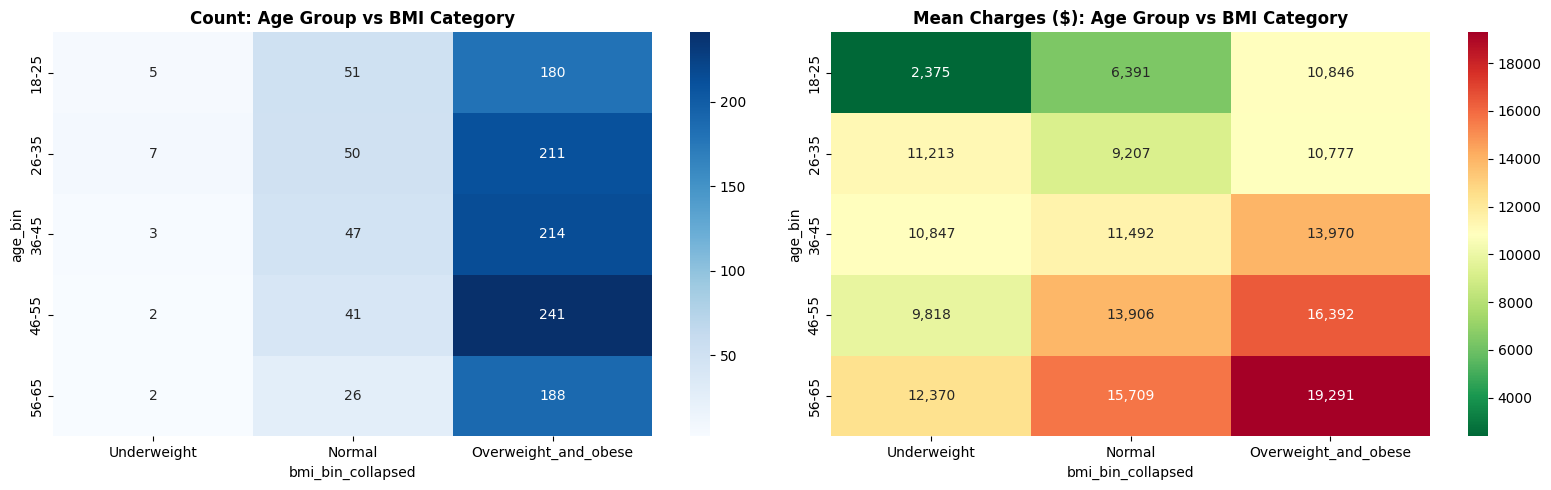

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Count heatmap
sns.heatmap(crosstab_collapsed, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Count: Age Group vs BMI Category', fontweight='bold')

# Mean charges heatmap
sns.heatmap(crosstab_charges_collapsed, annot=True, fmt=',.0f', cmap='RdYlGn_r', ax=axes[1])
axes[1].set_title('Mean Charges ($): Age Group vs BMI Category', fontweight='bold')

plt.tight_layout()
plt.show()

* Underweight is extremely rare (only 2-7 people per age group),statistically insignificant

* Overweight and Obese I dominate across all age groups

* Since the underweight is rare, we can collapse it to normal.

In [31]:
medical_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1337 non-null   int64  
 1   bmi                     1337 non-null   float64
 2   children                1337 non-null   int64  
 3   charges                 1337 non-null   float64
 4   sex_male                1337 non-null   int64  
 5   smoker_yes              1337 non-null   int64  
 6   region_northwest        1337 non-null   int64  
 7   region_southeast        1337 non-null   int64  
 8   region_southwest        1337 non-null   int64  
 9   bmi_group_encoded       1337 non-null   float64
 10  age_smoker_interaction  1337 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 115.0 KB


In [33]:
print(medical_df_clean[['bmi', 'bmi_group_encoded']].corr())

                        bmi  bmi_group_encoded
bmi                1.000000           0.938795
bmi_group_encoded  0.938795           1.000000


In [37]:
medical_df_clean.drop(columns=['bmi_group_encoded'], inplace = True)

In [38]:
medical_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1337 non-null   int64  
 1   bmi                     1337 non-null   float64
 2   children                1337 non-null   int64  
 3   charges                 1337 non-null   float64
 4   sex_male                1337 non-null   int64  
 5   smoker_yes              1337 non-null   int64  
 6   region_northwest        1337 non-null   int64  
 7   region_southeast        1337 non-null   int64  
 8   region_southwest        1337 non-null   int64  
 9   age_smoker_interaction  1337 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.6 KB


In [46]:
x = sm.add_constant(medical_df_clean.drop(columns=['charges']))
y = medical_df_clean['charges']


train_x, test_x, train_y, test_y = train_test_split(x,
                 y,
                 train_size = 0.8,
                 random_state = 100)

model_1 = sm.OLS(train_y, train_x).fit().summary()

model_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     354.0
Date:                Thu, 26 Feb 2026   Prob (F-statistic):          5.55e-312
Time:                        13:30:30   Log-Likelihood:                -10835.
No. Observations:                1069   AIC:                         2.169e+04
Df Residuals:                    1059   BIC:                         2.174e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.187e+04   1140.612    -10.406      0.000   -1.41e+04   -9630.998
age                      256.6992     14.934     17.189      0.000     227.396     286.002
bmi                      331.4847     32.347     10.248      0.000     268.014     394.955
children                 480.0189    160.005      3.000      0.003     166.056     793.982
sex_male                 -67.2069    377.025     -0.178      0.859    -807.007     672.594
smoker_yes              2.147e+04   1402.022     15.314      0.000    1.87e+04    2.42e+04
region_northwest        -184.5896    541.262     -0.341      0.733   -1246.658     877.479
region_southeast        -577.8769    544.653     -1.061      0.289   -1646.599     490.846
region_southwest        -794.7109    539.696     -1.473      0.141   -1853.706     264.285
age_smoker_interaction    53.7420     33.937      1.584      0.114     -12.850     120.334
==============================================================================
Omnibus:                      242.263   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.087
Skew:                           1.228   Prob(JB):                    3.94e-122
Kurtosis:                       5.553   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall Model Performance:

* R² = 0.751 → the model explains 75.1% of variance in charges. Decent for a linear model but leaves 25% unexplained.

* Adj. R² = 0.748 → barely drops from R², meaning your features are genuinely useful, not just adding noise

* F-statistic p-value = 5.55e-312 → the model as a whole is highly statistically significant.

* Based on p-value, we reject p-value greater than 0.05

Diagnostic warnings:

* Skew = 1.228 and Kurtosis = 5.553 → residuals are not normally distributed — a key OLS assumption is violated

* Prob(Omnibus) = 0.000 → confirms non-normality of residuals

* Jarque-Bera p ≈ 0 → same conclusion

* These all shows that this model is not following normal distribution.

**Model Evaluation**